# Pstat 234 - Spring 2018

## Assignment 1

## Nhan Huynh

### Simulation study for Goodness of fit test


__Problem:__ (*Simulation by Sheldon Ross/ Chapter 11; p. 268*) To ascertain whether a certain die was fair, $1000$ rolls of the die were recorded, with the result that the numbers of times the die landed $i, i=1,2,3,4,5,6$ were, respectively, $158, 172, 164, 181, 160, 165$. Approximate the p-value of the test that the die was fair using (a) Chi-square approximation and (b) Simulation.

If the die is fair, the chance of getting any value between $1$ to $6$ is equally distributed with probability $p_i=\frac{1}{6}$ where $i=1,2,...,6$. Therefore, the hypothesis test for this problem can be stated as follows:
$H_0: p_1=p_2=p_3=p_4=p_5=p_6=\frac{1}{6}$ vs. $H_a: \text{ not } H_0$

The test statistic is: $$T_0=\sum_{i=1}^6\frac{(O_i-E_i)^2}{E_i} \stackrel{\text{approx under }H_0}{\sim} \chi^2_{df=6-1=5}$$

Under the null hypothesis: $E_i=np_i=1000*\frac{1}{6}=\frac{1000}{6}$ for $i=1,2,3,4,5,6$. We have a table below:

| Die value (i) | Observed value ($O_i$) | Expected ($E_i$) | Emperical probability ($\hat{p_i}$)| Expected probability ($p_i$)|
|-----------|----------------|----------|-------|-------|
|     1     |   158          |1000/6    |0.158  |1/6    |
|     2     |   172          |1000/6    |0.172  |1/6    |
|     3     |   164          |1000/6    |0.164  |1/6    |
|     4     |   181          |1000/6    |0.181  |1/6    |
|     5     |   160          |1000/6    |0.160  |1/6    |
|     6     |   165          |1000/6    |0.165  |1/6    |
$$\rightarrow T_0=\sum_{i=1}^6\frac{(O_i-E_i)^2}{E_i}=\frac{(158-1000/6)^2+...+(165-1000/6)^2}{1000/6}=2.18$$
Therefore: $$\text{p-value}=Pr(\chi^2_{df=5}\geq T_0 | H_0 \text{ is true})=Pr(\chi^2_{df=5} \geq 2.18)=0.8237195.$$ 


In [1]:
import numpy as np
observed = np.array([158,172,164,181,160,165])
expected = np.array([1000/6]*6)
T0       = np.sum((observed-expected)**2/expected)
T0

2.1800000000000002

In [2]:
from scipy.stats.distributions import chi2
chi2.sf(2.18,5) # p-value from chi-square distribution with df=5

0.82371953925778141

Using the level of significance of $\alpha=0.05$ and $\text{p-value}>\alpha \rightarrow$ we fail to reject the null. Hence, the die is fair.

The above method is to calculate p-value using Chi-square approximation. Alternatively, we can estimate p-value using simulation. If we recall the definition of p-value which is the chance we will observe the test statistics which are extreme or more extreme than what we have observed given the null hypothesis is true, we can compute the sampling distribution of the test statistic (given the null hypothesis is true) to approximate p-value. 

- *Step 1*: Roll a fair die (assume the null hypothesis is true) 1,000 times. 
- *Step 2*: Record the number of times each number on the die was rolled in step 1.
- *Step 3*: Calculate a new observed test statistic $T^*_0=\sum_{i=1}^6\frac{(O^*_i-E_i)^2}{E_i}$ where $O^*_i$ are observed frequencies from step 2 and $E_i=\frac{1000}{6}$ for $i=1,2,...,6.$
- *Step 4*: Repeat step 1, 2, 3 many times.
- *Step 5*: Approximate p-value which is the number of times $T^*_0 \geq 2.18$ out of the total number of simulations.

In [3]:
from numpy.random import randint

# write a function to roll a dice 1,000 times
# return a list of how many times each number on a die was rolled

np.random.seed(4082018)
def rollDie(number=1000):
    counts = np.array([0] * 6)
    for i in range(number):
        roll = randint(size=1,low=1,high=7)
        counts[roll - 1] += 1
    return counts

# return a test statistic after 1,000 rolls
def testStat():
    observed = rollDie()
    expected = np.array([1000/6]*6)
    
    return sum((observed-expected)**2/expected)

In [4]:
# repeat the experiment many times
def sampling_testStat(repeat=100):
    out = np.array([testStat() for one in range(repeat)])
    
    return np.round(out,5)

We will first roll a fair die 1,000 times and repeat the experiment 500 times. We collect a new observed test statistic after each simulation and then compute the sampling distribution of the test statistic. 

In [5]:
outTestStat=sampling_testStat(500)

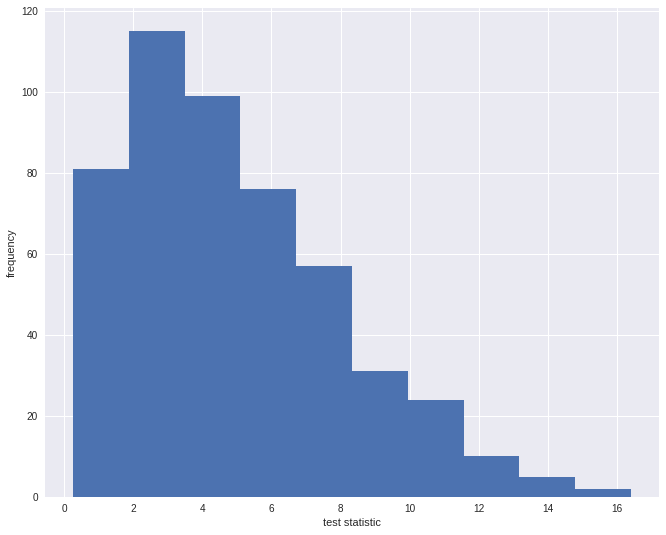

In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn; seaborn.set()  # set plot style
from IPython.core.pylabtools import figsize
figsize(11, 9)
plt.hist(outTestStat);
plt.xlabel('test statistic');
plt.ylabel('frequency');

In [7]:
# compute p-value:
p_value = sum(outTestStat>=2.180)/500
p_value

0.81599999999999995

From our simulation study, the estimated p-value$=0.81599 \geq \alpha=0.05 \rightarrow$ fail to reject the null. Also, the value of p-value using Chi-square method is close to the p-value using simulation. Both methods yield the same conclusion that the die is fair. 